<a href="https://colab.research.google.com/github/denniss83/Turkiye_Deprem_Analizi_2000_2025/blob/main/T%C3%BCrkiye_Deprem_Analizi_(2000%E2%80%932025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 Türkiye Deprem Analizi (2000–2025)

📌 **Bu çalışma, 2000–2025 yılları arasında Türkiye'de meydana gelen depremlerin analiz edilmesini amaçlamaktadır.**  
Veriler, **AFAD Deprem Dairesi Başkanlığı** tarafından sağlanan resmi kaynaklardan elde edilmiştir. Harita bazlı analizler ile zaman ve lokasyona göre deprem eğilimleri görselleştirilmiştir.

---

## 🎯 Çalışmanın Amacı
- Türkiye'deki depremleri şehir (il) bazında analiz etmek  
- Zaman serisi trendlerini incelemek  
- Depremlerin sıklığını harita üzerinde bölgesel olarak görselleştirmek  
- Veri bilimi teknikleri ile **gerçek dünya verisi** üzerinde uygulamalı analiz yapmak

---

## ⚠️ Önemli Notlar
- Bu çalışma **eğitim ve portföy geliştirme** amacıyla hazırlanmıştır.  
- Deprem verileri, [AFAD Resmi Web Sitesi](https://deprem.afad.gov.tr) üzerinden alınmıştır.  
- Veri seti, **temiz ve düzenli** bir şekilde sağlandığı için ayrıca veri temizliği uygulanmamıştır.  
- İstatistiksel veya mühendislik tabanlı bir risk analizi amacı **taşımamaktadır**.

---

> ⛳ **Not:** Tüm analizler Python dili kullanılarak yapılmış, haritalar `folium` kütüphanesiyle oluşturulmuştur. Proje, özellikle veri analitiği öğrenen bireylerin uygulama geliştirmesi için örnek niteliğindedir.


In [1]:
!pip install tabulate

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import plotly.express as px
from tabulate import tabulate
import warnings
import requests
import json
warnings.filterwarnings("ignore")
plt.style.use("ggplot")


In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
df = pd.read_csv("data.csv")
df.head()

,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID
0,28/06/2025 08:47:44,27.8969,37.1544,7.00,0.71,ML,1.4,Milas (Muğla),665576
1,28/06/2025 08:37:21,31.0778,38.9236,12.70,0.64,ML,1.0,Bolvadin (Afyonkarahisar),665577
2,28/06/2025 08:05:21,37.4844,37.7047,7.02,0.38,ML,2.0,Gölbaşı (Adıyaman),665575
3,28/06/2025 07:53:33,38.4411,38.1628,7.00,0.30,ML,1.2,Battalgazi (Malatya),665574
4,28/06/2025 07:02:19,40.0864,38.6469,6.96,0.24,ML,1.9,Palu (Elazığ),665573


# 📊 Deprem Verilerinin Genel Özeti (2000–2025)

Bu bölümde, 2000–2025 yılları arasında Türkiye’de meydana gelen toplam deprem sayısı analiz edilmiştir. Ayrıca büyüklüğü 3.5 ve üzeri olan depremler filtrelenmiş, sıklıkları hesaplanmıştır.

Ayrıca, büyüklük değerine göre en şiddetli ilk 20 deprem tablo halinde sunulmuştur. Bu sayede analiz edilen dönem boyunca en etkili depremler kolayca görülebilir.

### İçerik:
- Toplam deprem sayısı
- 3.5 ve üzeri büyüklüğe sahip depremler
- 5.0 ve üzeri büyüklüğe sahip depremler
- En büyük 20 depremin listesi (büyüklüğe göre sıralı)

> **Not:** Büyüklük sınıflandırması `Magnitude` sütunu baz alınarak yapılmıştır.

## 📌 Deprem Verileri (2000–2025 arası, tüm veri)

Bu bölümde Türkiye’de 2000–2025 yılları arasında kaydedilen toplam deprem sayısı ve büyüklük dağılımı incelenmiştir. 3.5 ve 5.0 üzeri depremlerin sayısı özetlenmiştir.

In [5]:
tum_deprem_sayisi = len(df)
deprem_35_ustu = len(df[df['Magnitude'] >= 3.5])
deprem_5_ustu = len(df[df['Magnitude'] >= 5.0])

veriler = [
    ["Toplam Deprem Sayısı", tum_deprem_sayisi],
    ["3.5 ve Üzeri Depremler", deprem_35_ustu],
    ["5.0 ve Üzeri Depremler", deprem_5_ustu]
]
print("\n📌 Deprem Verileri (2000–2025 arası, tüm veri)")
print(tabulate(veriler, headers=["Kategori", "Sayı"], tablefmt="fancy_grid"))



📌 Deprem Verileri (2000–2025 arası, tüm veri)
╒════════════════════════╤════════╕
│ Kategori               │   Sayı │
╞════════════════════════╪════════╡
│ Toplam Deprem Sayısı   │ 497309 │
├────────────────────────┼────────┤
│ 3.5 ve Üzeri Depremler │  12055 │
├────────────────────────┼────────┤
│ 5.0 ve Üzeri Depremler │    291 │
╘════════════════════════╧════════╛


## 🌍 En Büyük İlk 20 Deprem (2000–2025)

Bu tabloda, büyüklük bakımından en şiddetli ilk 20 deprem listelenmiştir. Tarih, lokasyon ve büyüklük bilgileri sunularak depremlerin etkisi vurgulanmıştır.


In [25]:
en_buyuk_20 = df.sort_values(by="Magnitude", ascending=False).head(20)
en_buyuk_20 = en_buyuk_20[["Date", "Location", "Magnitude"]]
print("\n📌 \033[1mEn Büyük İlk 20 Deprem (2000–2025)\033[0m")
print(tabulate(en_buyuk_20.values, headers=["Tarih", "Lokasyon", "Büyüklük"], tablefmt="fancy_grid"))


📌 En Büyük İlk 20 Deprem (2000–2025)
╒═════════════════════╤════════════════════════════════════════════════╤════════════╕
│ Tarih               │ Lokasyon                                       │   Büyüklük │
╞═════════════════════╪════════════════════════════════════════════════╪════════════╡
│ 2023-02-06 01:17:32 │ Pazarcık (Kahramanmaraş)                       │        7.7 │
├─────────────────────┼────────────────────────────────────────────────┼────────────┤
│ 2023-02-06 10:24:47 │ Elbistan (Kahramanmaraş)                       │        7.6 │
├─────────────────────┼────────────────────────────────────────────────┼────────────┤
│ 2020-01-24 17:55:11 │ Sivrice (Elazığ)                               │        6.8 │
├─────────────────────┼────────────────────────────────────────────────┼────────────┤
│ 2011-10-23 10:41:20 │ Tuşba (Van)                                    │        6.7 │
├─────────────────────┼────────────────────────────────────────────────┼────────────┤
│ 2020-10-30 11:

## 📈 En Çok Deprem Olan İlk 10 İl / İlçe (2000–2025)

Deprem sayısına göre sıralanmış en aktif 10 il veya ilçe bu tabloda sunulmuştur. Türkiye’nin deprem açısından en hareketli bölgeleri belirlenmiştir.


In [26]:
en_cok_deprem_ilk10 = df['Location'].value_counts().head(10).reset_index()
en_cok_deprem_ilk10.columns = ['Lokasyon', 'Deprem Sayısı']

from tabulate import tabulate

print("\n📌 \033[1mEn Çok Deprem Olan İlk 10 İl / İlçe (2000–2025)\033[0m")
print(tabulate(en_cok_deprem_ilk10.values, headers=en_cok_deprem_ilk10.columns, tablefmt="fancy_grid"))


📌 En Çok Deprem Olan İlk 10 İl / İlçe (2000–2025)
╒════════════════════════╤═════════════════╕
│ Lokasyon               │   Deprem Sayısı │
╞════════════════════════╪═════════════════╡
│ Simav (Kütahya)        │           13760 │
├────────────────────────┼─────────────────┤
│ Akhisar (Manisa)       │            8918 │
├────────────────────────┼─────────────────┤
│ Tuşba (Van)            │            8507 │
├────────────────────────┼─────────────────┤
│ Pütürge (Malatya)      │            7675 │
├────────────────────────┼─────────────────┤
│ Menteşe (Muğla)        │            7532 │
├────────────────────────┼─────────────────┤
│ Yeşilyurt (Malatya)    │            7285 │
├────────────────────────┼─────────────────┤
│ Göksun (Kahramanmaraş) │            6812 │
├────────────────────────┼─────────────────┤
│ Doğanşehir (Malatya)   │            6278 │
├────────────────────────┼─────────────────┤
│ Tavşanlı (Kütahya)     │            6105 │
├────────────────────────┼─────────────────┤
│ Si

## 🔴 5.0 ve Üzeri En Çok Deprem Olan İlk 10 İl / İlçe (2000–2025)

Büyüklüğü 5.0 ve üzeri olan depremlerin en sık görüldüğü ilk 10 yerleşim bölgesi gösterilmiştir. Bu bölgeler ciddi sismik aktiviteye sahiptir.


In [27]:
df_5ustu = df[df['Magnitude'] >= 5.0]

en_cok_5ustu = df_5ustu['Location'].value_counts().head(10).reset_index()
en_cok_5ustu.columns = ['Lokasyon', '5.0+ Deprem Sayısı']

print("\n📌 \033[1m5.0 ve Üzeri En Çok Deprem Olan İlk 10 İl / İlçe (2000–2025)\033[0m")
print(tabulate(en_cok_5ustu.values, headers=en_cok_5ustu.columns, tablefmt="fancy_grid"))


📌 5.0 ve Üzeri En Çok Deprem Olan İlk 10 İl / İlçe (2000–2025)
╒══════════════════════════╤══════════════════════╕
│ Lokasyon                 │   5.0+ Deprem Sayısı │
╞══════════════════════════╪══════════════════════╡
│ Göksun (Kahramanmaraş)   │                   11 │
├──────────────────────────┼──────────────────────┤
│ Yeşilyurt (Malatya)      │                    8 │
├──────────────────────────┼──────────────────────┤
│ Karlıova (Bingöl)        │                    8 │
├──────────────────────────┼──────────────────────┤
│ Tuşba (Van)              │                    7 │
├──────────────────────────┼──────────────────────┤
│ Sivrice (Elazığ)         │                    7 │
├──────────────────────────┼──────────────────────┤
│ Ayvacık (Çanakkale)      │                    6 │
├──────────────────────────┼──────────────────────┤
│ Doğanşehir (Malatya)     │                    6 │
├──────────────────────────┼──────────────────────┤
│ Pütürge (Malatya)        │                    6 │


## 📍 Deprem Sıklığına Göre En Sık Deprem Olan İlk 10 Lokasyon (2000–2025)

Yerleşim bazında (şehir/ilçe/semt) en sık deprem yaşanan 10 lokasyon analiz edilmiştir. Mikro düzeyde riskli bölgeler belirlenmiştir.


In [28]:
toplam_gun = 25 * 365

deprem_sayilari = df['Location'].value_counts().reset_index()
deprem_sayilari.columns = ['Lokasyon', 'Deprem Sayısı']

deprem_sayilari['Günlük Ortalama'] = deprem_sayilari['Deprem Sayısı'] / toplam_gun

en_sik_10 = deprem_sayilari.sort_values(by='Günlük Ortalama', ascending=False).head(10)

from tabulate import tabulate

print("\n📌 \033[1mDeprem Sıklığına Göre En Sık Deprem Olan İlk 10 Lokasyon (2000–2025)\033[0m")
print(tabulate(en_sik_10.values, headers=en_sik_10.columns, tablefmt="fancy_grid"))


📌 Deprem Sıklığına Göre En Sık Deprem Olan İlk 10 Lokasyon (2000–2025)
╒════════════════════════╤═════════════════╤═══════════════════╕
│ Lokasyon               │   Deprem Sayısı │   Günlük Ortalama │
╞════════════════════════╪═════════════════╪═══════════════════╡
│ Simav (Kütahya)        │           13760 │          1.50795  │
├────────────────────────┼─────────────────┼───────────────────┤
│ Akhisar (Manisa)       │            8918 │          0.977315 │
├────────────────────────┼─────────────────┼───────────────────┤
│ Tuşba (Van)            │            8507 │          0.932274 │
├────────────────────────┼─────────────────┼───────────────────┤
│ Pütürge (Malatya)      │            7675 │          0.841096 │
├────────────────────────┼─────────────────┼───────────────────┤
│ Menteşe (Muğla)        │            7532 │          0.825425 │
├────────────────────────┼─────────────────┼───────────────────┤
│ Yeşilyurt (Malatya)    │            7285 │          0.798356 │
├─────────────────

## 📊 Yıllara Göre 5.0 ve Üzeri Deprem Sayısı (2000–2025)

Her yıl meydana gelen 5.0 üzeri depremlerin sayısı grafiğe dökülerek yıllara göre eğilim (trend) analizi yapılmıştır.


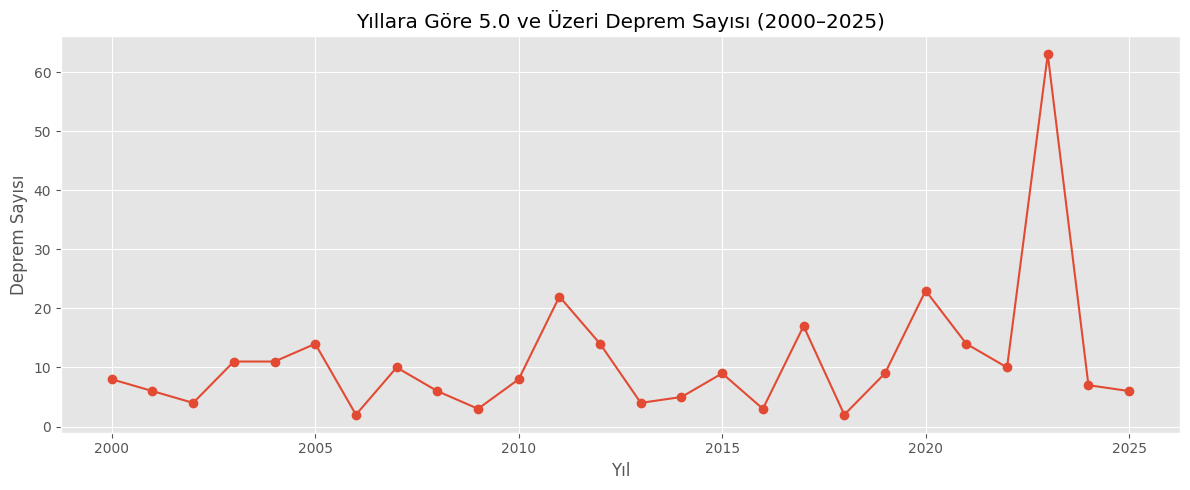

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Yıl'] = df['Date'].dt.year

df_yillik_5ustu = df[df['Magnitude'] >= 5.0].groupby('Yıl').size().reset_index(name='5.0+ Deprem Sayısı')

plt.figure(figsize=(12, 5))
plt.plot(df_yillik_5ustu['Yıl'], df_yillik_5ustu['5.0+ Deprem Sayısı'], marker='o')
plt.title('Yıllara Göre 5.0 ve Üzeri Deprem Sayısı (2000–2025)')
plt.xlabel('Yıl')
plt.ylabel('Deprem Sayısı')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📅 Aylara Göre Deprem Dağılımı (2000–2025)

Depremlerin ay bazlı dağılımı analiz edilmiştir. Bu sayede mevsimsel veya dönemsel bir yoğunluk olup olmadığı görülmektedir.


In [11]:
df['Ay'] = df['Date'].dt.month
df_aylik = df.groupby('Ay').size().reset_index(name='Deprem Sayısı')

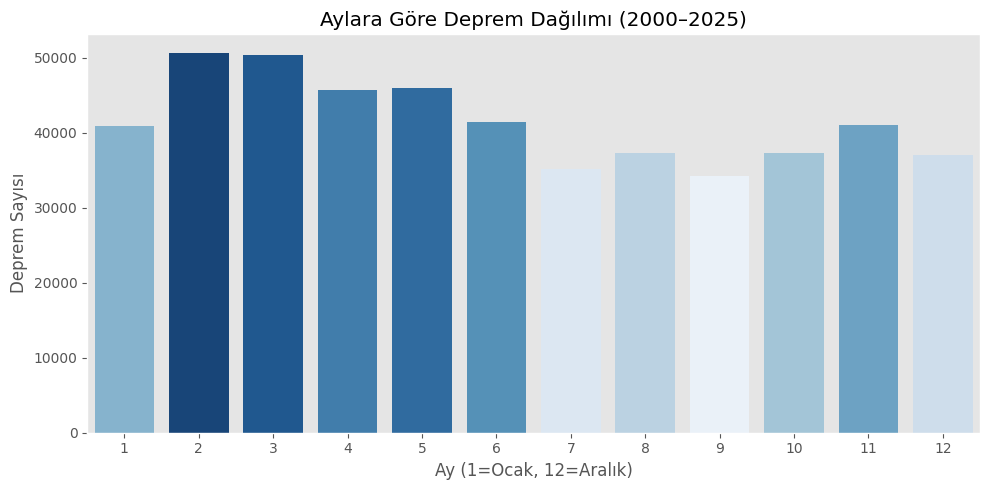

In [12]:
siralama = df_aylik['Deprem Sayısı'].rank(method='min')
renkler = sns.color_palette("Blues", n_colors=12)
renk_map = [renkler[int(i) - 1] for i in siralama]

plt.figure(figsize=(10, 5))
sns.barplot(data=df_aylik, x='Ay', y='Deprem Sayısı', palette=renk_map)

plt.title('Aylara Göre Deprem Dağılımı (2000–2025)')
plt.xlabel('Ay (1=Ocak, 12=Aralık)')
plt.ylabel('Deprem Sayısı')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 🌐 Derinliğe Göre Deprem Yoğunluğu (2000–2025)

Depremlerin odak derinliklerine göre dağılımı incelenmiştir. Yüzeysel ve derin depremler farklı renklendirme ile gösterilmiştir.

In [13]:
max_depth = df['Depth'].max()

bins = [0, 10, 30, 70, 300, 700]
if max_depth > 700:
    bins.append(max_depth + 1)

labels = ['0–10 km', '10–30 km', '30–70 km', '70–300 km', '300–700 km']
if max_depth > 700:
    labels.append('700+ km')

df['Derinlik_Kategori'] = pd.cut(df['Depth'], bins=bins, labels=labels)

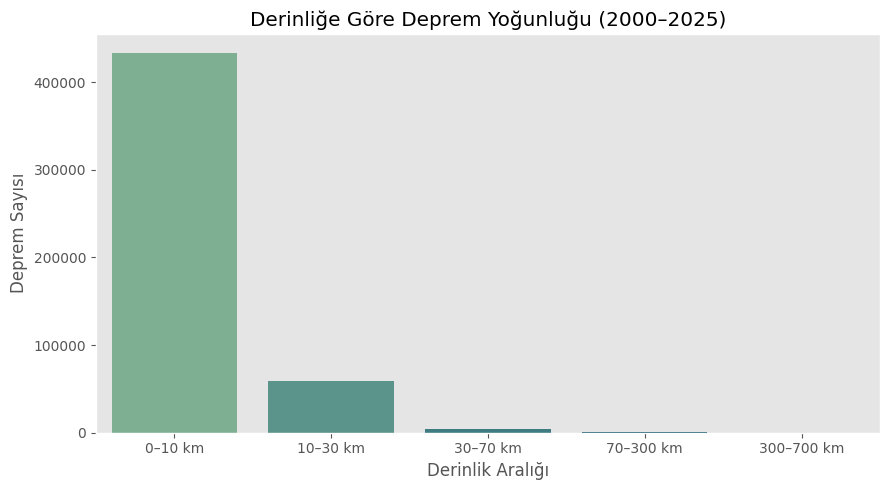

In [14]:
df_depth = df['Derinlik_Kategori'].value_counts().sort_index().reset_index()
df_depth.columns = ['Derinlik Aralığı', 'Deprem Sayısı']

plt.figure(figsize=(9, 5))
sns.barplot(data=df_depth, x='Derinlik Aralığı', y='Deprem Sayısı', palette='crest')

plt.title('Derinliğe Göre Deprem Yoğunluğu (2000–2025)')
plt.xlabel('Derinlik Aralığı')
plt.ylabel('Deprem Sayısı')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 📏 Büyüklük Aralıklarına Göre Deprem Sıklığı (2000–2025)

Magnitude değerine göre gruplandırılarak hangi büyüklükte depremlerin ne sıklıkla meydana geldiği histogram grafiği ile sunulmuştur.


In [15]:
df['Buyukluk_Kategori'] = pd.cut(
    df['Magnitude'],
    bins=[0, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 10],
    labels=['<3.0', '3.0–3.9', '4.0–4.9', '5.0–5.9', '6.0–6.9', '7.0–7.9', '8.0+']
)

df_mag = df['Buyukluk_Kategori'].value_counts().sort_index().reset_index()
df_mag.columns = ['Büyüklük Aralığı', 'Deprem Sayısı']

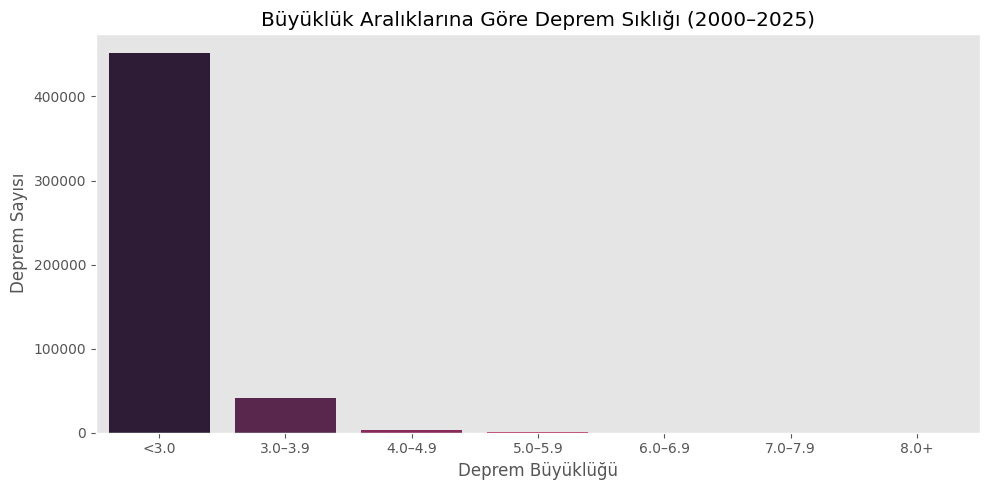

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mag, x='Büyüklük Aralığı', y='Deprem Sayısı', palette='rocket')

plt.title('Büyüklük Aralıklarına Göre Deprem Sıklığı (2000–2025)')
plt.xlabel('Deprem Büyüklüğü')
plt.ylabel('Deprem Sayısı')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 🏙️ İlk 5 Lokasyonda Yıllara Göre Deprem Sayısı (2000–2025)

Deprem sayısı açısından en aktif ilk 5 lokasyonda yıllara göre deprem sayısının nasıl değiştiği gösterilmiştir. Zaman serisi bazlı bir karşılaştırmadır.

In [17]:
ilk5_lokasyon = df['Location'].value_counts().head(5).index.tolist()

In [18]:
df_ilk5 = df[df['Location'].isin(ilk5_lokasyon)]
df_yil_lokasyon = df_ilk5.groupby(['Yıl', 'Location']).size().unstack().fillna(0)

<Figure size 1200x600 with 0 Axes>

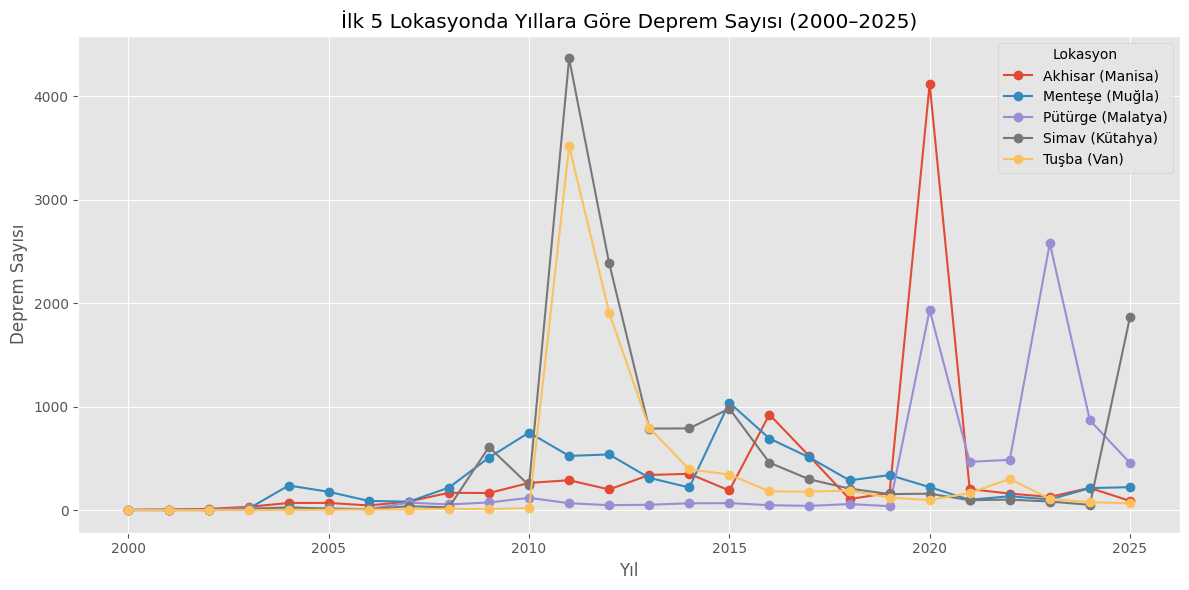

In [19]:
plt.figure(figsize=(12, 6))
df_yil_lokasyon.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('İlk 5 Lokasyonda Yıllara Göre Deprem Sayısı (2000–2025)')
plt.xlabel('Yıl')
plt.ylabel('Deprem Sayısı')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Lokasyon')
plt.show()

# 🗺️ Türkiye Haritasında Deprem Yoğunluğu Görselleştirmesi (2000–2025)

Bu bölümde, Türkiye'deki iller bazında 2000–2025 yılları arasında meydana gelen toplam deprem sayıları görselleştirilmiştir. Her il renklendirilerek, deprem yoğunluğu yeşilden kırmızıya doğru gösterilmiştir (yeşil: az deprem, kırmızı: çok deprem).

📌 **Harita verisi**: Türkiye şehir sınırları GeoJSON dosyası  
🔗 Kaynak: [alpers/Turkey-Maps-GeoJSON (GitHub)](https://github.com/alpers/Turkey-Maps-GeoJSON)  
🔒 Lisans: Apache License 2.0

🔍 Harita üzerinde fare ile herhangi bir ile geldiğinizde, o ilde meydana gelen toplam deprem sayısı gösterilir.


In [20]:
df['il'] = df['Location'].str.extract(r'\((.*?)\)')

depremler_iller = df['il'].value_counts().reset_index()
depremler_iller.columns = ['il', 'deprem_sayisi']

In [21]:
ortalama = depremler_iller['deprem_sayisi'].mean()
deprem_dict = dict(zip(depremler_iller['il'], depremler_iller['deprem_sayisi']))

In [22]:
url = "https://raw.githubusercontent.com/alpers/Turkey-Maps-GeoJSON/master/tr-cities.json"

In [23]:
response = requests.get(url)
geo_data = response.json()

In [24]:
import folium
from folium.features import GeoJsonTooltip

ortalama = depremler_iller['deprem_sayisi'].mean()

deprem_dict = dict(zip(depremler_iller['il'], depremler_iller['deprem_sayisi']))

for feature in geo_data['features']:
    il_adi = feature['properties']['name']
    feature['properties']['deprem_sayisi'] = deprem_dict.get(il_adi, 0)

def style_function(feature):
    deprem_sayisi = feature['properties']['deprem_sayisi']

    if deprem_sayisi < ortalama / 2:
        color = '#31a354'
    elif deprem_sayisi > ortalama * 2:
        color = '#de2d26'
    elif ortalama / 2 <= deprem_sayisi <= ortalama:
        color = '#ffeda0'
    else:
        color = '#feb24c'

    return {
        'fillOpacity': 0.8,
        'weight': 1,
        'color': 'blue',
        'fillColor': color
    }

m = folium.Map(location=[39.0, 35.0], zoom_start=6)

folium.GeoJson(
    geo_data,
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['name', 'deprem_sayisi'],
        aliases=['İl:', 'Deprem Sayısı:'],
        localize=True,
        labels=True,
        sticky=True
    )
).add_to(m)

m